In [3]:
#loading necessary libraries

import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load data
data = pd.read_csv("/content/tmdb-movies.csv")
print(data.shape)

#Inspecting the 10 first rows from the Data
data.head(10)

#Get info about the data
#data.info()



#Data cleaning

#converting the release date from string to datetime format
data['release_date'] = pd.to_datetime(data['release_date'])

#check for null values
data.isnull().sum()

#check for duplicate values
#data.duplicated().sum()
data = data.drop_duplicates()
data.duplicated().sum()

(10866, 21)


<ipython-input-3-dd9d320184fc>:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['release_date'] = pd.to_datetime(data['release_date'])


0

In [4]:
#remove the unused columns from the dataset
nd= data.drop(['imdb_id', 'homepage', 'tagline', 'overview'], axis = 1)

#Drop rows with null values
nd = nd.dropna(axis=0)
nd.isnull().sum()
print(nd.shape)

#Get summary statistics
nd.describe()

(8666, 17)


,id,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,8666.000000,8666.000000,8.666000e+03,8.666000e+03,8666.000000,8666,8666.000000,8666.000000,8666.000000,8.666000e+03,8.666000e+03
mean,57003.179206,0.741937,1.770937e+07,4.924863e+07,103.815140,2006-08-16 11:38:13.930302464,264.204823,6.003612,2000.129818,2.130749e+07,6.362440e+07
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,1974-01-01 00:00:00,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,9816.750000,0.249990,0.000000e+00,0.000000e+00,91.000000,1996-08-03 18:00:00,20.000000,5.500000,1993.000000,0.000000e+00,0.000000e+00
50%,16216.500000,0.449377,1.500000e+06,1.793820e+05,100.000000,2006-08-13 00:00:00,54.000000,6.100000,2004.000000,2.130703e+06,1.891237e+05
75%,54003.000000,0.842984,2.100000e+07,3.890269e+07,113.000000,2012-06-13 00:00:00,200.000000,6.600000,2011.000000,2.810466e+07,5.524857e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,2073-12-26 00:00:00,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09
std,86242.565745,1.087657,3.357362e+07,1.289529e+08,26.207186,NaN,635.195808,0.893539,13.221278,3.710269e+07,1.592874e+08


before removing outliers:  8666
after removing outliers:  7511


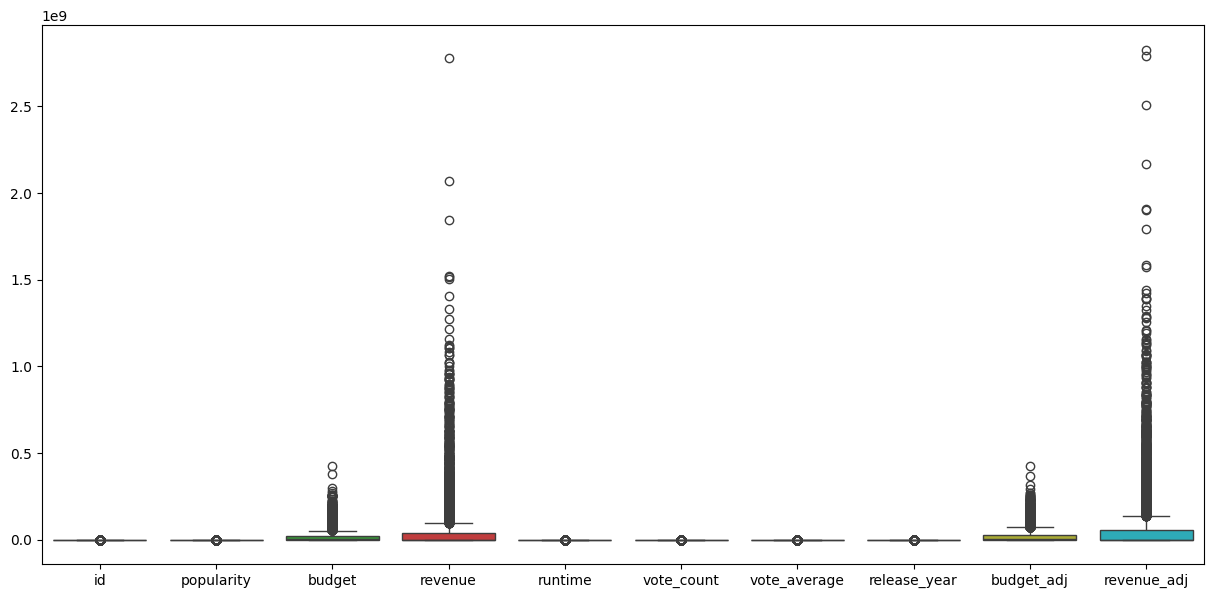

In [5]:
plt.figure(figsize=(15,7))
sns.boxplot(data=nd)

#Remove outliers
numeric_nd = nd.select_dtypes(include=[float, int])

for col in numeric_nd:
    q1 = nd[col].quantile(0.25)
    q3 = nd[col].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    new_nd = nd.loc[(nd[col] <= upper_limit) & (nd[col] >= lower_limit)]
print('before removing outliers: ', len(nd))
print('after removing outliers: ', len(new_nd))


<ipython-input-18-8b99beec4c5d>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='actor', y='appearances', data=nd_actors, palette="Set3")


[Text(0.5, 0, 'actor names'),
 Text(0, 0.5, 'number of appearances'),
 Text(0.5, 1.0, 'Top 10 actors based on his appearances in movies')]

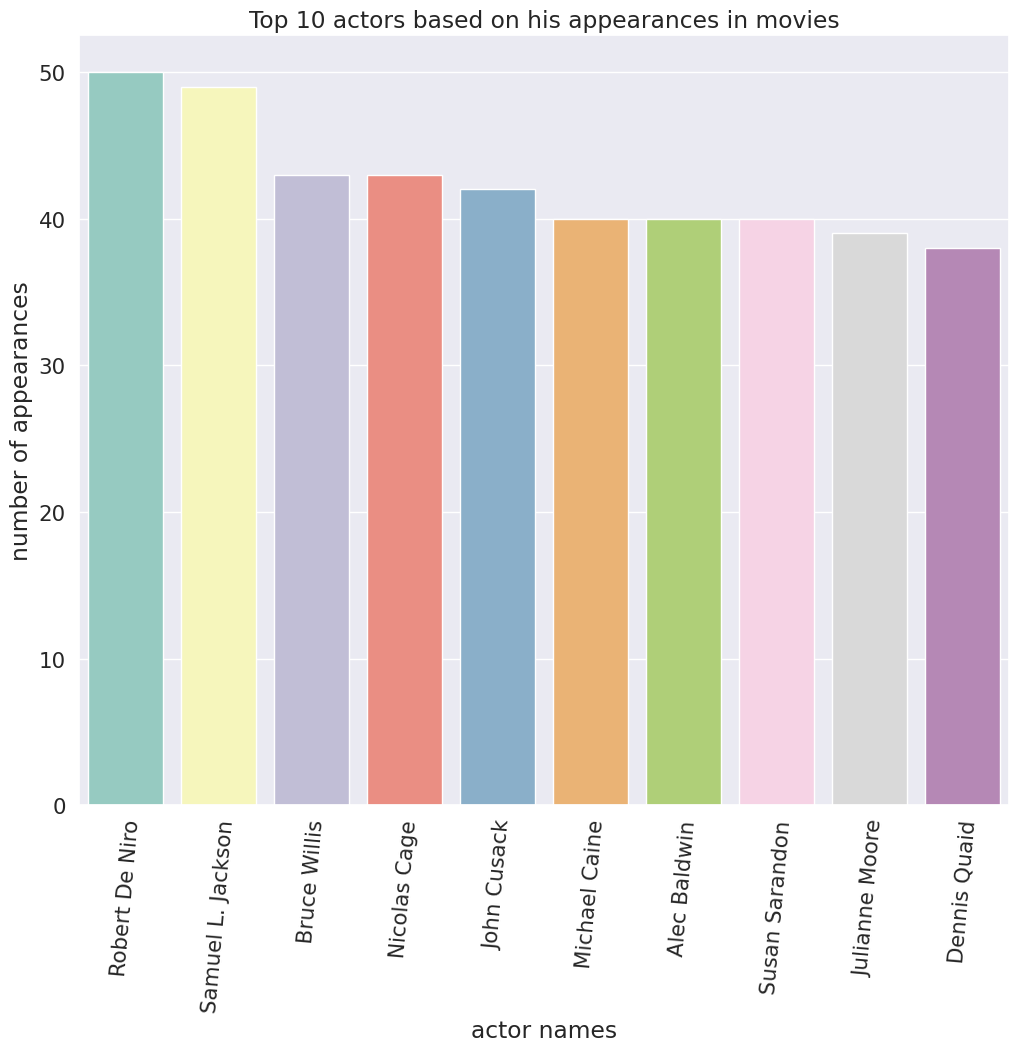

In [18]:

nd = new_nd
#Creating a dict for the cast, and how many times each actor casted for movies
actor_dict = {}

actors = nd["cast"]
actors = actors.str.split("|")
actors = np.array(actors)
for actorList in actors:
    #check if there is a problematic list which is just a float
    for actor in actorList:
        actor = actor.lstrip() #trim the whitespaces
        if actor not in actor_dict:
            actor_dict[actor] = 1
        else:
            actor_dict[actor] += 1

sorted_actor_dict = sorted(actor_dict.items(), key = operator.itemgetter(1), reverse = True)
#sorted_actor_dict[0:10]

x_axis = list()
y_axis = list()

for item in sorted_actor_dict[0:10]:
    x_axis.append(item[0])
    y_axis.append(item[1])

nd_actors = pd.DataFrame({'actor': x_axis, 'appearances': y_axis})
sns.set(rc={'figure.figsize':(12,10)}, font_scale=1.4)
ax = sns.barplot(x='actor', y='appearances', data=nd_actors, palette="Set3")

#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)


ax.set(xlabel='actor names', ylabel='number of appearances', title = 'Top 10 actors based on his appearances in movies')



Text(0.5, 1.0, 'Number of Movies per Genre')

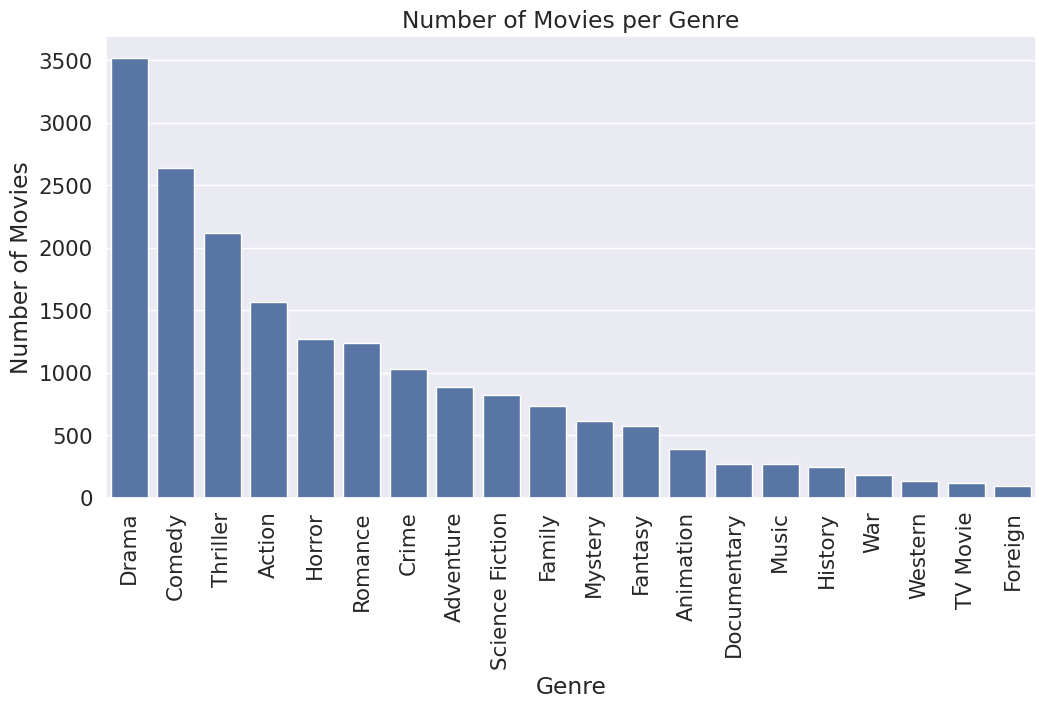

In [7]:
# Split the genres and count the number of movies for each
genres_list = nd['genres'].str.split('|').explode()
genre_counts = genres_list.value_counts()

# Create a barplot to visualize the results
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Genre')


In [8]:
highest_avg_vote_genre = nd.groupby('genres')['vote_average'].mean().idxmax()
highest_avg_vote_value = nd.groupby('genres')['vote_average'].mean().max()

print(f"Genre with the highest average vote: {highest_avg_vote_genre}, Average Vote: {highest_avg_vote_value}")

Genre with the highest average vote: Animation|Family|Romance, Average Vote: 8.0


[Text(0.5, 0, 'movie'),
 Text(0, 0.5, 'revenue adjusted'),
 Text(0.5, 1.0, 'Top 10 movies based on their adjusted revenue')]

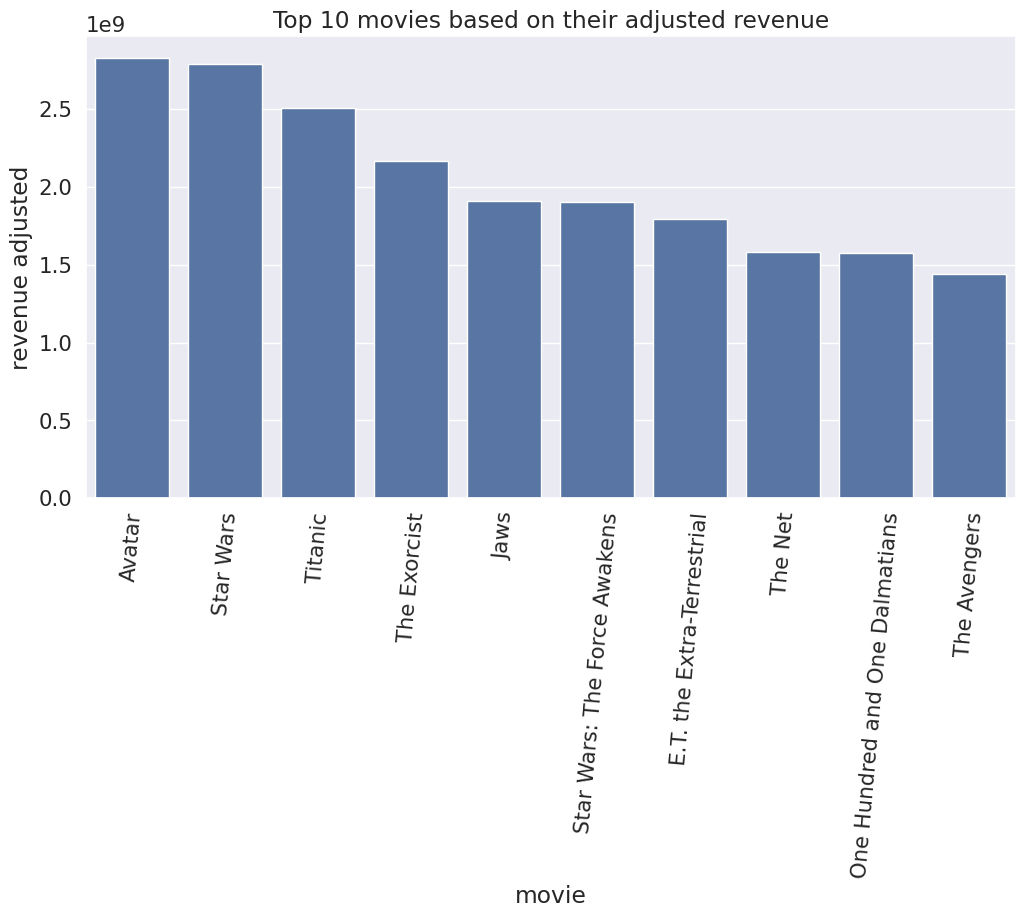

In [15]:
sns.set(rc={'figure.figsize':(12,6)}, font_scale=1.4)


movies_and_revenue = data[["original_title", "revenue_adj"]]
ax = sns.barplot(
   x=movies_and_revenue.sort_values(by = "revenue_adj", ascending=False).head(10).original_title,
   y= movies_and_revenue.sort_values(by = "revenue_adj", ascending=False).head(10).revenue_adj)



#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)


ax.set(xlabel='movie', ylabel='revenue adjusted', title = 'Top 10 movies based on their adjusted revenue')


<Axes: xlabel='runtime', ylabel='original_title'>

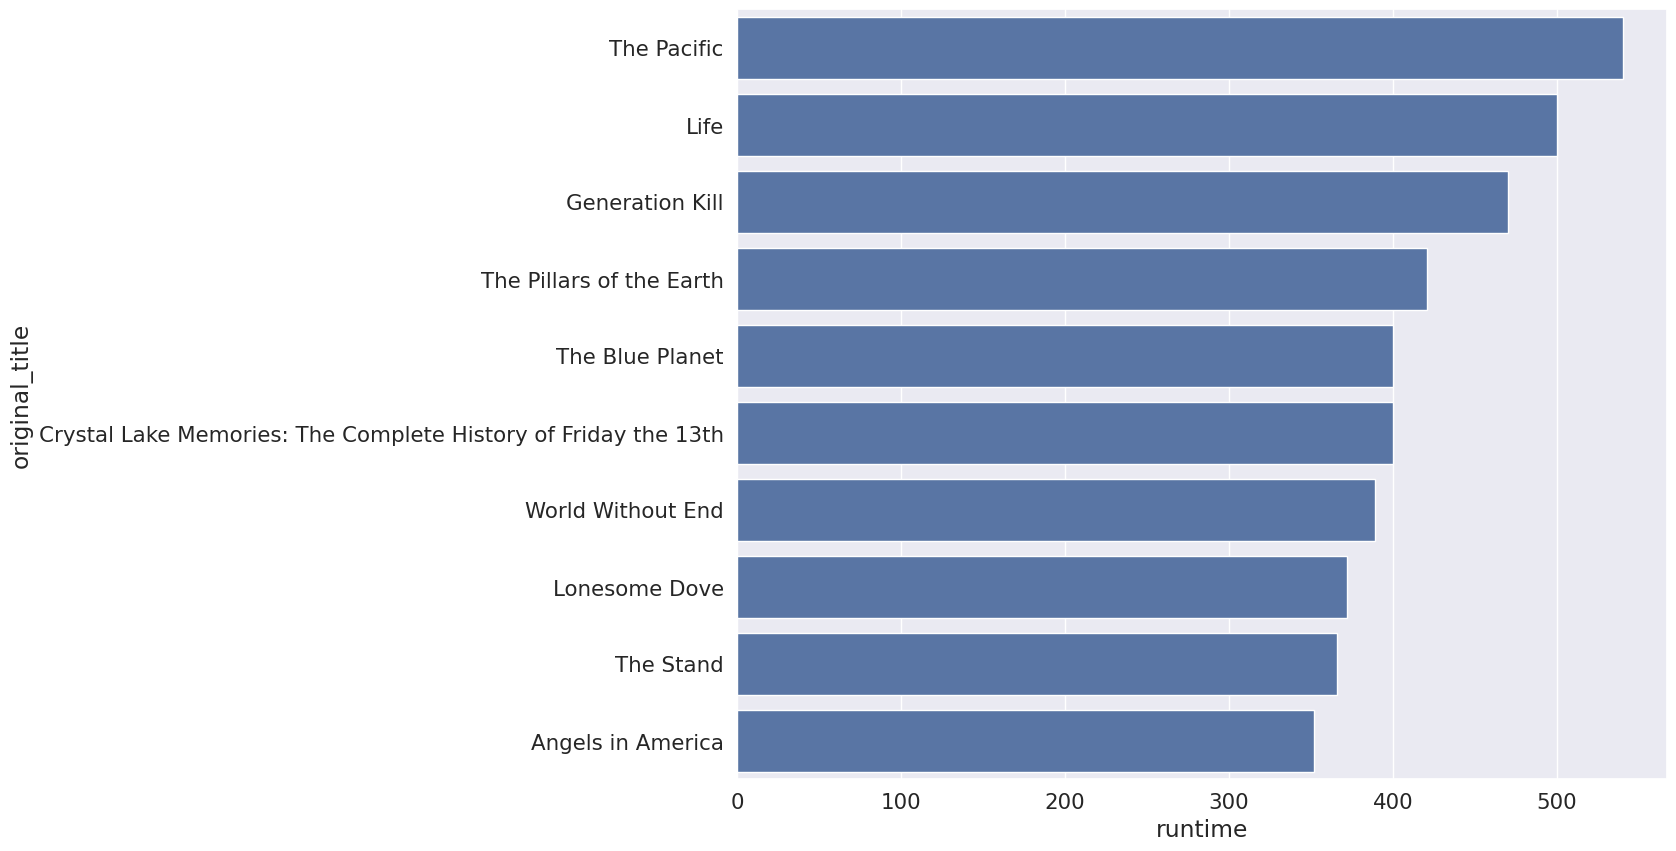

In [30]:
#Top 10 movies based on runtime
top10_len = nd.nlargest(10, 'runtime')[['original_title', 'runtime']].set_index('original_title')
top10_len
sns.barplot(x='runtime', y=top10_len.index, data=top10_len)


Text(0, 0.5, 'Adjusted Revenue')

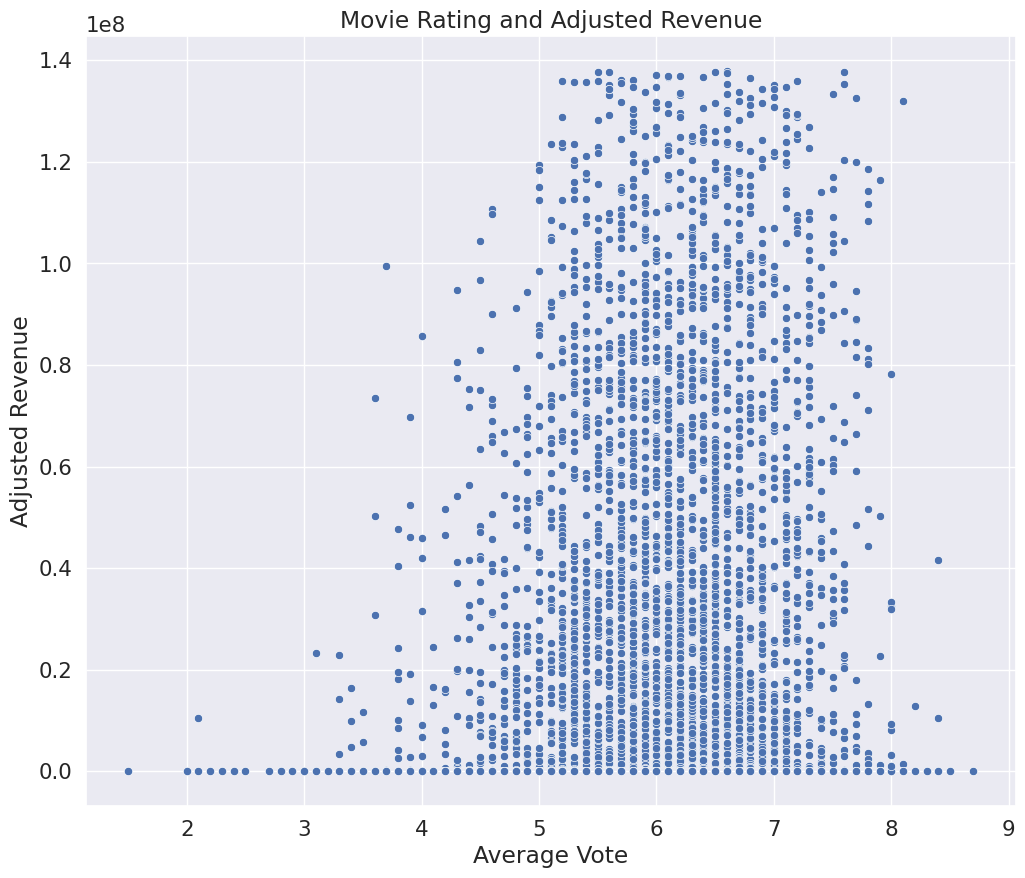

In [28]:
#Does Voting affect Revenue?
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='vote_average', y='revenue_adj', data=nd)
plt.title('Movie Rating and Adjusted Revenue')
plt.xlabel('Average Vote')
plt.ylabel('Adjusted Revenue')

